## Data saftey and manipulation
Using code from:https://thispointer.com/python-add-a-column-to-an-existing-csv-file/ <br>
We will first duplicate the data from the database into a new file called "workingData" <br>
Then we will add in a new column "distance from edge of park"

This is line by line the code from the link above. <br>
It will also duplicate our data and call the transform_row function detailed below to add the distance from edge of park.

In [10]:
import pandas as pd

from csv import writer
from csv import reader
def add_dist(input_file, output_file, transform_row):
    """ Append a column in existing csv using csv.reader / csv.writer classes"""
    # Open the input_file in read mode and output_file in write mode
    with open(input_file, 'r') as read_obj, \
            open(output_file, 'w', newline='') as write_obj:
        # Create a csv.reader object from the input file object
        csv_reader = reader(read_obj)
        # Create a csv.writer object from the output file object
        csv_writer = writer(write_obj)
        # Read each row of the input csv file as list
        for row in csv_reader:
            # Pass the list / row in the transform function to add column text for this row
            row = transform_row(row, csv_reader.line_num)
            # Write the updated row / list to the output file
            csv_writer.writerow(row)

To get the distance from edge of the park I created two functions. <br>
This first one does the nitty gritty math of finding distance.<br>
Here stack overflow offers a solution.https://stackoverflow.com/questions/39840030/distance-between-point-and-a-line-from-two-points<br>
I took the base code from Szymon Szott's answer<br>
Then I added the lat long for each corner of central park. <br>
#### Important Note!
Since I did this distance calulation in lat long which do not have a 1 to 1 corrilation to distance or eachother due to curvature of the earth my units for this new distance calulation are void. However I am going to continue to use the "distance" it gives as a rough estimation regardless of the units. Because this no longer has units I also multiple it by 1000 to make it more readable. But future research should definitely factor in the any discrepencies or errors that may arise from this decision.

In [11]:
import numpy as np

def findDistance(xcord, ycord):
    northP = np.array([40.80062, -73.95804])
    westP = np.array([40.76808, -73.98188])
    southP = np.array([40.76479, -73.97304])
    eastP = np.array([40.79693, -73.94943])
    p3=np.array([xcord,ycord])
    
    dFromNorthEdge = abs(np.cross(northP-eastP,p3-eastP)/np.linalg.norm(northP-eastP))
    dFromWestEdge = abs(np.cross(northP-westP,p3-westP)/np.linalg.norm(northP-westP))
    dFromSouthEdge = abs(np.cross(southP-westP,p3-westP)/np.linalg.norm(southP-westP))
    dFromEastEdge = abs(np.cross(southP-eastP,p3-eastP)/np.linalg.norm(southP-eastP))
    
    distList = [dFromNorthEdge,dFromWestEdge,dFromSouthEdge,dFromEastEdge]
    distMin = min(distList)
    
    return distMin

This is where I added in a middle function to increase legitbility. 

In [12]:

def transformRow (row, reader):
    # Prliminary code to ensure my understanding of what is being passed...   
    # print(row)
    # print(type(row))
    # print(type(row[0]))
    # print(reader)
    # print(type(reader))
    
    if reader == 1:
        row.append("Distance")
    else:
        shortestD = findDistance(float(row[1]), float(row[0]))
        row.append(shortestD*1000)

    return(row)

Here I call the function above

In [ ]:
add_dist("2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv","workingData.csv",transformRow);

## Starting Analysis:
First we will make a heat map of the central park to get a visual represntation for all the variables being looked at:"Run From," "Approaches," "Indifferent," and "Tail Flagging"

To do that we need to group the data into several different data frames 4 different dataframes.

In [ ]:
df = pd.read_csv('workingData.csv')

rfGroup = df.groupby(df['Runs from'])
rf = rfGroup.get_group(True)

apGroup = df.groupby(df.Approaches)
aprch = apGroup.get_group(True)

inGroup = df.groupby(df.Indifferent)
indf = inGroup.get_group(True)

tfGroup = df.groupby(df['Tail flags'])
tf = tfGroup.get_group(True)


Then we start mapping!
First we do all the data to get a sense of what we are working with.

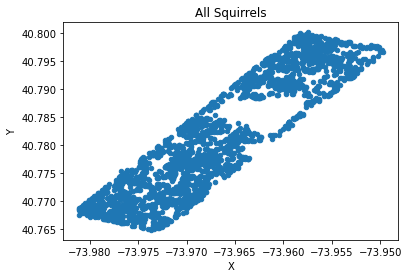

In [8]:
>>> DefaultMap = df.plot.scatter(x='X', y='Y', title="All Squirrels") 
# the whole in the map is water :)

Then I print out all the technical data to back up my optical analysis

In [ ]:
print("Default Graph")
print("Average distance from edge: ")
aveDist=df["Distance"].mean()
print(aveDist)
print("Number of data points: ")
print(len(df))


Default Graph
Average distance from edge: 
2.0111902390053733
Number of data points: 
3023


Here we map out our second data frame and first behavior "runs from"!

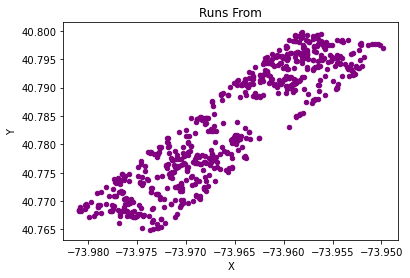

In [ ]:
>>> RFMap = rf.plot.scatter(x='X', y='Y', c='purple',title="Runs From")

Then again print out the stats for nerds. This time with the delta of average distance from the whole set above.

In [ ]:
print("'Runs From' Graph")
print("Average distance from edge: ")
print(rf["Distance"].mean())
print("Delta of ave distance:")
print(aveDist - rf["Distance"].mean())
print("Number of data points: ")
print(len(rf))

'Runs From' Graph
Average distance from edge: 
2.0419531123995935
Delta of ave distance:
-0.030762873394220236
Number of data points: 
678


Then the second behavior "approaches"!

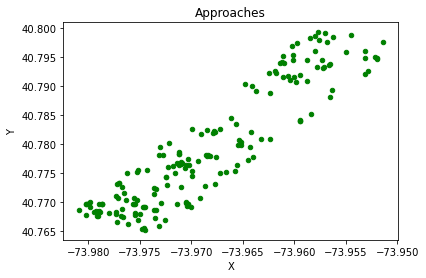

In [ ]:
>>> aprchMap = aprch.plot.scatter(x='X',y='Y',c='green', title="Approaches")

And then more details of the graph above!

In [ ]:
print("'Approaches' Graph")
print("Average distance from edge: ")
print(aprch["Distance"].mean())
print("Delta of ave distance:")
print(aveDist - aprch["Distance"].mean())
print("Number of data points: ")
print(len(aprch))

'Approaches' Graph
Average distance from edge: 
2.0723493106589883
Delta of ave distance:
-0.061159071653615005
Number of data points: 
178


Now map the third behavior indifferent..

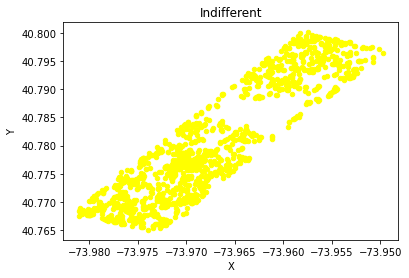

In [ ]:
>>> indfMap = indf.plot.scatter(x='X', y='Y',c='yellow', title="Indifferent")


And more stats for more clarity

In [ ]:
print("Indifferent Graph")
print("Average distance from edge: ")
print( indf["Distance"].mean())
print("Delta of ave distance:")
print(aveDist - rf["Distance"].mean())
print("Number of data points: ")
print(len(indf))

Indifferent Graph
Average distance from edge: 
2.0098817385664605
Delta of ave distance:
-0.030762873394220236
Number of data points: 
1454


Then the final behavior!

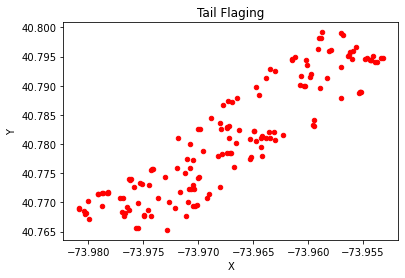

In [ ]:
>>> tfMap = tf.plot.scatter(x='X', y='Y', c='red', title="Tail Flaging")

And the final set of stats.

In [ ]:
print("Tail Flag Graph")
print("Average distance from edge: ")
print(tf["Distance"].mean())
print("Delta of ave distance:")
print(aveDist - tf["Distance"].mean())
print("Number of data points: ")
print(len(tf))

Tail Flag Graph
Average distance from edge: 
1.9871517524935807
Delta of ave distance:
0.024038486511792634
Number of data points: 
155


Now that was a lot of data we just went through and the maps didn't have any obvious trends to follow up on. So lets collect all that data in a nicer more readable format.

In [26]:
d = {'Data': ['All_Squirrels', 'Approaches', 'Indifferent', 'Runs_From', 'Tail_Flags'], 
     'DF_Name':['df', 'aprch','indf','rf','tf'],
     'Num_Entrees':[3023,178,1454,678,155],
     'Ave_Dist': [0.20111902390053737, 0.20723493106589883,0.20098817385664589,0.20419531123995935,0.19871517524935806],
     'Std_Div':[df['Distance'].std(),aprch['Distance'].std(),indf['Distance'].std(),rf['Distance'].std(),tf['Distance'].std()]
     }
summaryTable = pd.DataFrame(data=d)
summaryTable


,Data,DF_Name,Num_Entrees,Ave_Dist,Std_Div
0,All_Squirrels,df,3023,0.201119,1.354206
1,Approaches,aprch,178,0.207235,1.357983
2,Indifferent,indf,1454,0.200988,1.392395
3,Runs_From,rf,678,0.204195,1.325093
4,Tail_Flags,tf,155,0.198715,1.307943
